In [9]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils as util
from construct_model_matrices import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

In [10]:
#DATA_DIR = '../../data/Xy_internal_split_data'
DATA_DIR = '../../data/Xy_random_split_data'

In [11]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)

In [ ]:
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv'] 
  ['y_train_1998.csv', 'y_train_1999.csv', 'y_train_2000.csv', 'y_train_2001.csv', 'y_train_2002.csv', 'y_train_2003.csv', 'y_train_2004.csv', 'y_train_2005.csv', 'y_train_2006.csv', 'y_train_2007.csv', 'y_train_2008.csv', 'y_train_2009.csv', 'y_train_2010.csv', 'y_train_2011.csv', 'y_train_2012.csv', 'y_train_2013.csv', 'y_train_2014.csv', 'y_train_2015.csv']
Valid:
  ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.cs

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [6]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (779953, 820)
 y: (779953, 1)
Valid:
 X: (97348, 820)
 y: (97348, 1)
Test:
 X: (97687, 820)
 y: (97687, 1)


In [8]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:
x
y
lon
lat
etopo1
btl_t1
btl_t2
vgt
age
density
sum9_t1
sum9_t2
year
JanTmin
MarTmin
TMarAug
summerTmean
AugTmean
AugTmax
GSP
PMarAug
summerP0
OctTmin
fallTmean
Tmin
Tmean
Tvar
TOctSep
summerP1
summerP2
Pmean
POctSep
PcumOctSep
PPT
Lcs
maxAugT
summerT40
OptTsum
AugMaxT
maxT
Ecs
Ncs
Acs
drop0
drop5
drop10
drop15
drop20
drop20plus
max.drop
ddAugJul
ddAugJun
Oct20
Oct30
Oct40
Jan20
Jan30
Jan40
Mar20
Mar30
Mar40
winter20
winter30
winter40
OctMin
JanMin
MarMin
winterMin
minT
cv.gsp
cv.gsp:	12102
wd
vpd
mi
cwd
pt.coef
x.new
y.new
xy


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [7]:
max(X_test.x), max(X_test.y)

(195, 360)

In [8]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,summerP1:PPT,summerP2:Pmean,summerP2:PPT,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2
0,37,69,-119.110980,35.837349,141,0,0,0,0.0,685.590759,...,0.0,71.246358,8313.731294,1274.712659,2384.219847,10727.534453,33059.173593,148746.108359,278214.404698,0
1,38,69,-119.003126,35.859120,194,0,0,1,0.0,6174.752441,...,0.0,87.973222,10877.875727,1495.543933,2667.459467,12075.598338,40849.047960,184923.783018,329830.963074,0
2,39,69,-118.895219,35.880769,292,0,0,1,0.0,7538.154297,...,0.0,109.357355,14074.139083,1768.376840,3059.531818,13847.487076,50284.329646,227587.633142,393757.478054,0
3,40,69,-118.787258,35.902297,635,0,0,1,0.0,10577.365234,...,0.0,159.414539,20005.629382,2353.903810,4064.747016,17891.767901,67110.931910,295401.709572,510102.924386,0
4,41,69,-118.679245,35.923705,1250,1,1,1,38.0,41283.019531,...,0.0,268.615209,30930.918463,3727.077521,6608.496303,27649.504627,102576.042767,429171.272713,760965.328241,1


In [10]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density', cell_dim=1)
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density', cell_dim=1)
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density', cell_dim=1)

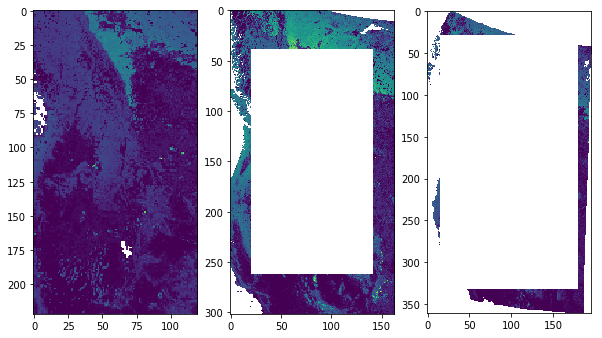

In [11]:
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [13]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1', cell_dim=1)
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1', cell_dim=1)

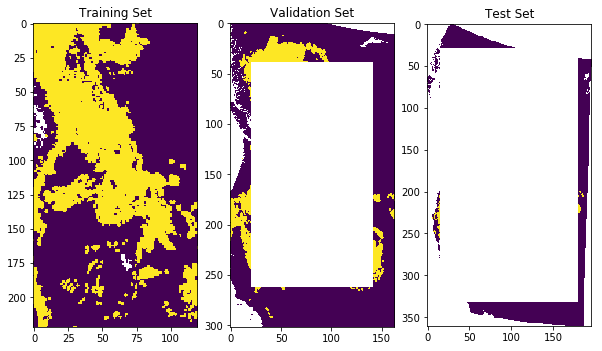

In [14]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [9]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 33.03%
Percent presence in y_valid: 10.32%
Percent presence in y_test: 1.44%


In [10]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 33.03)
print('  valid:', 100 - 10.31)
print('  test: ', 100 - 1.44)

Baseline accuracy if predicting "absent" for all cells:
  train: 66.97
  valid: 89.69
  test:  98.56


In [11]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [12]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [13]:
predictors = list(X_train)

In [14]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [15]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [16]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [19]:
# Find optimal regularization via best validation-set accuracy
#l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        #if penalty == 'l1':
        #    l1_mods.append(accuracy)
        #else:
        l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l2: 0.952
Elapsed time: 0.04 minutes
Testing C = 0.001
  l2: 0.9554
Elapsed time: 0.08 minutes
Testing C = 0.01
  l2: 0.9434
Elapsed time: 0.17 minutes
Testing C = 0.1
  l2: 0.9316
Elapsed time: 0.29 minutes
Testing C = 1.0
  l2: 0.8968
Elapsed time: 0.62 minutes


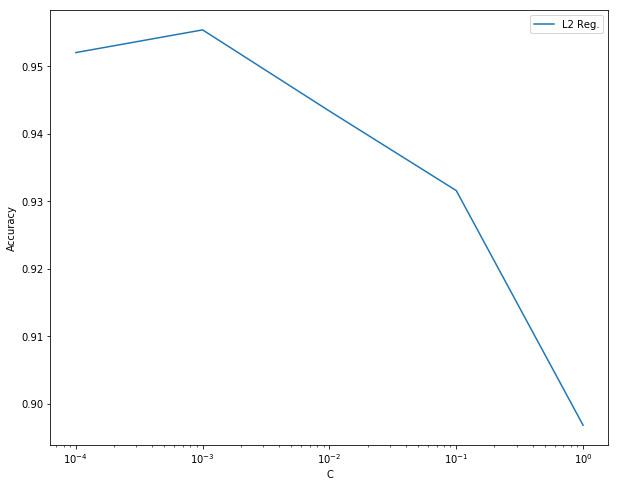

In [21]:
#plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [18]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-3.5, -2.5, 10)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.000316227766017
  l1: 0.9528
Elapsed time: 0.02 minutes
  l2: 0.9559
Elapsed time: 0.06 minutes
Testing C = 0.000408423865267
  l1: 0.9532
Elapsed time: 0.08 minutes
  l2: 0.9563
Elapsed time: 0.11 minutes
Testing C = 0.00052749970637
  l1: 0.9531
Elapsed time: 0.13 minutes
  l2: 0.9563
Elapsed time: 0.17 minutes
Testing C = 0.000681292069058
  l1: 0.9539
Elapsed time: 0.19 minutes
  l2: 0.9562
Elapsed time: 0.23 minutes
Testing C = 0.000879922543569
  l1: 0.9537
Elapsed time: 0.25 minutes
  l2: 0.9559
Elapsed time: 0.30 minutes
Testing C = 0.00113646366639
  l1: 0.9539
Elapsed time: 0.31 minutes
  l2: 0.9543
Elapsed time: 0.36 minutes
Testing C = 0.00146779926762
  l1: 0.9544
Elapsed time: 0.38 minutes
  l2: 0.9528
Elapsed time: 0.44 minutes
Testing C = 0.00189573565241
  l1: 0.9548
Elapsed time: 0.45 minutes
  l2: 0.9512
Elapsed time: 0.50 minutes
Testing C = 0.00244843674682
  l1: 0.9547
Elapsed time: 0.52 minutes
  l2: 0.9497
Elapsed time: 0.57 minutes
Testing C = 0.0

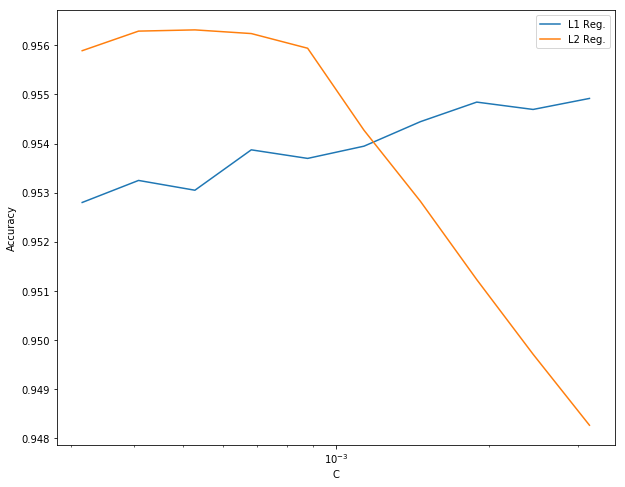

In [19]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [20]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.00031622776601683794, 0.95589114832535882),
 (0.00040842386526745213, 0.95628987240829344),
 (0.00052749970637026194, 0.95631479266347685),
 (0.00068129206905796151, 0.95624003189792661),
 (0.00087992254356910747, 0.95594098883572565),
 (0.0011364636663857243, 0.95427133173843703),
 (0.0014677992676220691, 0.95282595693779903),
 (0.0018957356524063754, 0.95123106060606055),
 (0.0024484367468222269, 0.94971092503987242),
 (0.0031622776601683794, 0.94826555023923442)]

In [21]:
best_C = 0.00052749970637026194

In [22]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.99250848648015921

In [23]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[ 0.97788589  0.02211411]
 [ 0.97270289  0.02729711]
 [ 0.97440819  0.02559181]
 [ 0.97315832  0.02684168]
 [ 0.97983718  0.02016282]]


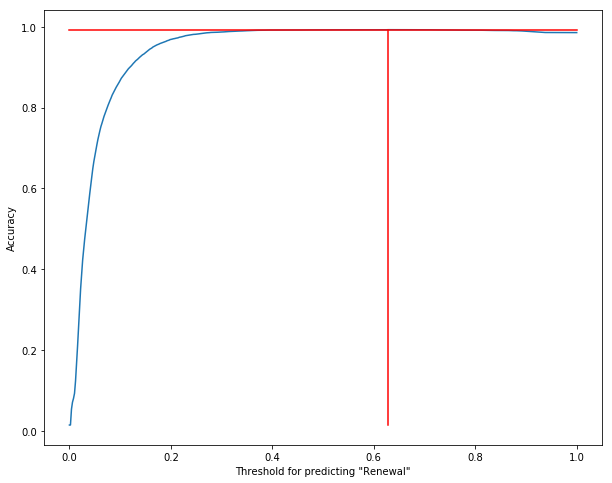

{'threshold': 0.62725450901803603, 'accuracy': 0.992801123727028}


In [24]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [25]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	182		64
        0	64		16776
Accuracy:  0.99250848648
Precision: 0.739837398374
Recall:    0.739837398374
F1:        0.739837398374


In [26]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	165		81
        0	42		16798
Accuracy:  0.992801123727
Precision: 0.797101449275
Recall:    0.670731707317
F1:        0.728476821192


In [27]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.986179103181


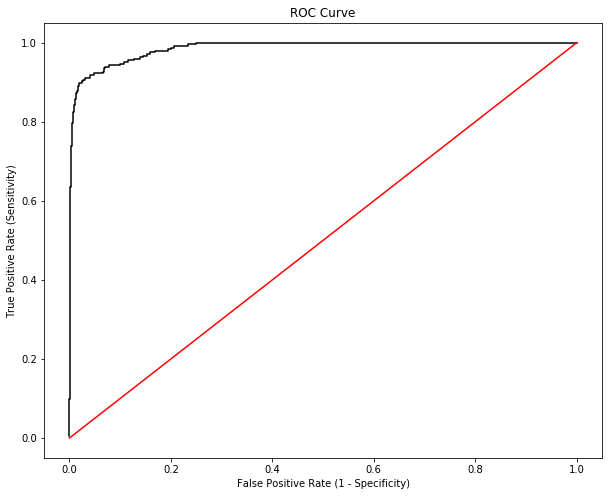

In [28]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [29]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
8,sum9_t1,0.578284
3,btl_t1,0.445214
9,sum9_t2,0.304247
5,vgt,0.268208
4,btl_t2,0.247457
228,btl_t1:btl_t2,0.176649
77,lat:etopo1,0.091632
48,OctTmin_sq,0.085175
1,lat,0.073580
68,lon:lat,-0.071063


In [44]:
print(full_train.shape)
type(pred_ps_train)

(52898, 234)


numpy.ndarray

In [56]:
logistic_clf.predict_proba(X_train)

array([[ 0.99146316,  0.00853684],
       [ 0.98341925,  0.01658075],
       [ 0.98209133,  0.01790867],
       ..., 
       [ 0.96527844,  0.03472156],
       [ 0.98025965,  0.01974035],
       [ 0.96949198,  0.03050802]])

In [67]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [68]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,Pmean:POctSep,Pmean:PcumOctSep,Pmean:PPT,POctSep:PcumOctSep,POctSep:PPT,PcumOctSep:PPT,btl_t1:btl_t2,btl_t,probs,preds
0,164,0,-104.671034,31.343318,1182,0,0,0,0.0,1513.529907,...,7728.515636,14722.520510,47478.045849,167774.444306,541048.847828,1.030677e+06,0,0,0.022114,0
1,165,0,-104.567392,31.348555,1348,0,0,0,0.0,3529.294678,...,9288.721479,17918.724079,56947.145630,200513.589331,637248.306400,1.229306e+06,0,0,0.027297,0
2,166,0,-104.463740,31.353674,1373,0,0,0,0.0,0.000000,...,9359.679818,18208.108228,57917.571668,199207.262723,633651.819883,1.232692e+06,0,0,0.025592,0
3,167,0,-104.360077,31.358676,1338,0,0,0,0.0,5712.242188,...,8819.522723,17290.923899,55501.409087,184260.186406,591449.019377,1.159553e+06,0,0,0.026842,0
4,168,0,-104.256404,31.363561,1154,0,0,0,0.0,509.230774,...,7772.170112,15359.644565,49922.198262,158397.422078,514826.204184,1.017418e+06,0,0,0.020163,0


In [69]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [70]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t', cell_dim=1)
    pred_matrix   = util.column2matrix(data_year, pred_type, cell_dim=1)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

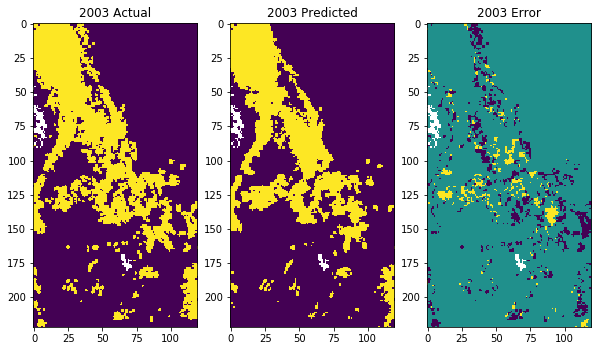

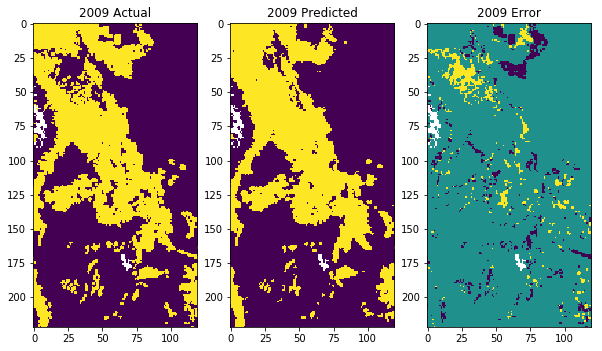

In [71]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

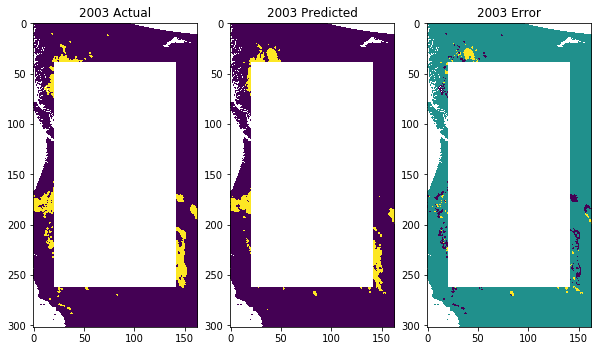

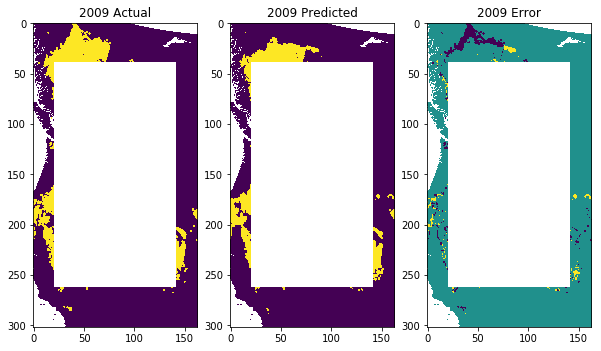

In [72]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

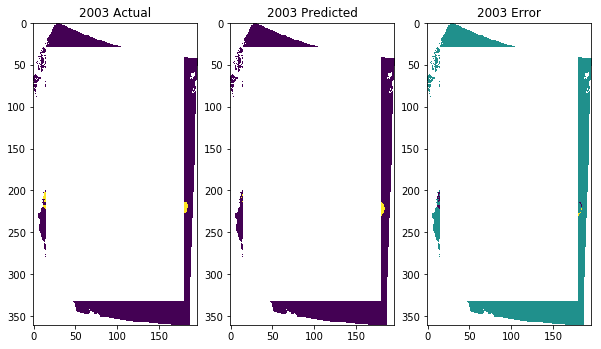

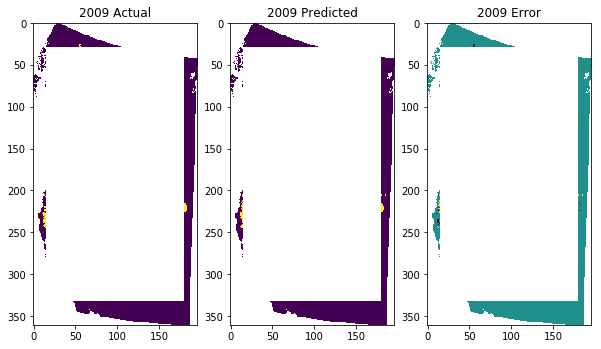

In [73]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [76]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

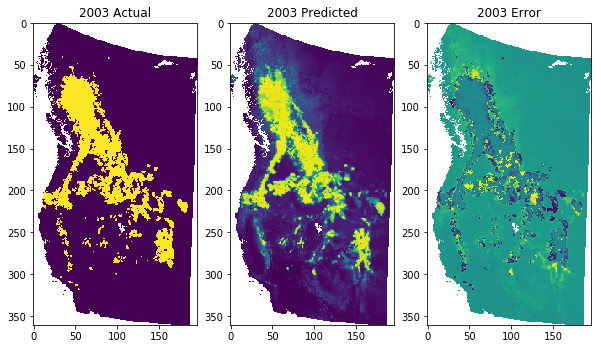

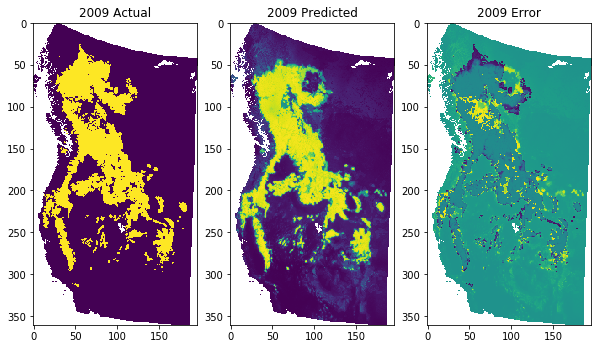

In [77]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)